<a href="https://colab.research.google.com/github/flavianacif/DSWP/blob/master/RFB_RN_usando_train_5_com_dummies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from tensorflow import keras

[**Python**] - Verificar a versão do Tensorflow
> Assegurar que está a utilizar a versão 2.x.

In [ ]:
tf.__version__

'2.3.0'

[**Python**] - Definir o número de casas decimais

In [2]:
np.set_printoptions(precision= 3)

### 1. Carregar os dados

[**Python**] - Carregar os dados:

In [3]:
# Leitura do dataframe:
df_train = pd.read_csv('/train_5.csv')

In [4]:
df_test = pd.read_csv('/test_5.csv')

In [5]:
df_train.shape

(11033, 40)

[**Python**] - Mostrar as primeiras 5 linhas:

In [6]:
df_train.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md7,md8,md9,md10,md12,mc1,mc3,mc4,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind12,ind13,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind31,ind32,ind34,ind36,ind37,target
0,0,86,1,0.015101,0.011256,0.111095,0.003233,0.003233,0.016366,0.021082,0.004541,0.004541,0.130930,0.003945,0.000138,0.003355,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,1.0,1.0,True
1,1,18,9,0.005996,0.019476,0.124770,0.000000,0.010487,0.029214,0.046445,0.000000,0.018198,0.138620,0.003186,0.003121,0.003355,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0125,0.0286,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,1.0,0.0,1.0,1.0,0.0,False
2,2,74,9,0.000006,0.002902,0.110160,0.002274,0.002274,0.002902,0.020058,0.003131,0.003131,0.130405,0.000015,0.000050,0.000209,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,False
3,3,49,4,0.000009,0.014526,0.120351,0.000000,0.000000,0.014526,0.032017,0.000000,0.000000,0.138620,0.000438,0.000042,0.000115,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0000,0.0000,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.1785,0.1667,0.1667,0.0,0.0,0.0,0.0,1.0,False
4,4,47,1,0.000191,0.004042,0.111078,0.001121,0.001121,0.006063,0.023705,0.011886,0.011886,0.131285,0.001925,0.003121,0.000719,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,False


### Pré-processamento e transformação dos dados

[**Python**] - Definir os arrays df_X e df_y:




In [24]:
df_X = df_train.copy()
df_X = df_X.drop(columns= ['target','id'])
df_y = df_train['target'].values

In [8]:
df_y

array([ True, False, False, ...,  True, False,  True])

[**Python**] - Normalizar os dados - StandardScaler()

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

SS = StandardScaler()
#MM = MinMaxScaler()

#df_X.drop(columns=['cnae2','md6','md11','mc2','ind01','ind09','ind10','ind11','ind14','ind15','ind16','ind17','ind18','ind28','ind29','ind30','ind38','ind39','ind40','ind41','ind42','ind43'], inplace=True,axis=1)
X_test = df_test.drop(columns=['id'],axis=1)
df_X['rf2'] = df_X['rf2'].astype('category')
X_test['rf2'] = X_test['rf2'].astype('category')
df_X['cnae2'] = df_X['cnae2'].astype('category')
X_test['cnae2'] = X_test['cnae2'].astype('category')

In [26]:


df_X = pd.get_dummies(df_X)
X_test = pd.get_dummies(X_test)
df_X[df_X.columns]= SS.fit_transform(df_X[df_X.columns])
X_test[X_test.columns]= SS.fit_transform(X_test[X_test.columns])
df_X

,md1,md2,md3,md4,md5,md7,md8,md9,md10,md12,mc1,mc3,mc4,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind12,ind13,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind31,ind32,ind34,ind36,ind37,cnae2_0,cnae2_1,cnae2_2,cnae2_3,...,cnae2_60,cnae2_61,cnae2_62,cnae2_63,cnae2_64,cnae2_65,cnae2_66,cnae2_68,cnae2_69,cnae2_70,cnae2_71,cnae2_72,cnae2_73,cnae2_74,cnae2_75,cnae2_77,cnae2_78,cnae2_79,cnae2_80,cnae2_81,cnae2_82,cnae2_85,cnae2_86,cnae2_87,cnae2_90,cnae2_91,cnae2_93,cnae2_94,cnae2_95,cnae2_96,rf2_0,rf2_1,rf2_2,rf2_3,rf2_4,rf2_5,rf2_6,rf2_7,rf2_8,rf2_9
0,2.001376,0.242357,-0.596385,-0.430638,0.152674,0.428471,-0.709793,-0.461886,-0.002502,-0.628558,2.134258,-0.556589,2.165120,-0.328086,-0.735539,-0.806095,-0.842409,-0.839243,-0.707050,-0.804816,-0.573635,-0.596183,0.673623,-1.556934,-1.247419,-1.215785,-0.764612,-0.751150,0.805421,-1.303257,-1.119314,-0.701970,-0.760228,-0.975378,0.607337,0.716694,-0.013465,-0.085463,-0.04953,-0.016492,...,-0.053082,-0.040424,-0.117401,-0.046691,-0.120148,-0.028573,-0.091195,-0.203806,-0.155353,-0.130949,-0.189894,-0.025196,-0.120535,-0.102179,-0.023326,-0.108341,-0.09896,-0.043669,-0.073324,-0.119369,-0.152576,-0.105742,3.417837,-0.035645,-0.056413,-0.009521,-0.044699,-0.031591,-0.040424,-0.053082,-0.276957,3.437175,-0.338463,-0.253461,-0.247535,-0.288916,-0.377945,-0.226633,-0.290937,-0.656081
1,0.387480,1.172213,1.430105,-0.760142,1.986368,1.579348,1.770106,-0.797393,2.028365,2.076478,1.566392,1.965044,2.165120,-0.664310,1.392895,0.117190,0.092460,0.655920,-0.689384,-0.787562,1.750520,-0.400652,-1.540288,0.136321,0.996572,1.033080,-0.429099,-0.080470,-0.638652,-0.309639,-0.815049,1.424563,-0.760228,1.025244,0.607337,-1.395295,-0.013465,-0.085463,-0.04953,-0.016492,...,-0.053082,-0.040424,-0.117401,-0.046691,-0.120148,-0.028573,-0.091195,-0.203806,-0.155353,-0.130949,-0.189894,-0.025196,-0.120535,-0.102179,-0.023326,-0.108341,-0.09896,-0.043669,-0.073324,-0.119369,-0.152576,-0.105742,-0.292583,-0.035645,-0.056413,-0.009521,-0.044699,-0.031591,-0.040424,-0.053082,-0.276957,-0.290937,-0.338463,-0.253461,-0.247535,-0.288916,-0.377945,-0.226633,-0.290937,1.524202
2,-0.674382,-0.702598,-0.734921,-0.528354,-0.089710,-0.777622,-0.809962,-0.566046,-0.212122,-0.813056,-0.805176,-0.631284,-0.618950,-0.664310,1.392895,1.409612,1.386654,1.276154,-0.707050,-0.804816,-0.573635,-0.596183,0.673623,0.663728,0.996572,1.033080,1.583274,1.596347,-0.638652,1.033231,1.121589,1.424563,1.315395,1.025244,0.607337,0.716694,-0.013465,-0.085463,-0.04953,-0.016492,...,-0.053082,-0.040424,-0.117401,-0.046691,-0.120148,-0.028573,-0.091195,-0.203806,-0.155353,-0.130949,-0.189894,-0.025196,-0.120535,9.786762,-0.023326,-0.108341,-0.09896,-0.043669,-0.073324,-0.119369,-0.152576,-0.105742,-0.292583,-0.035645,-0.056413,-0.009521,-0.044699,-0.031591,-0.040424,-0.053082,-0.276957,-0.290937,-0.338463,-0.253461,-0.247535,-0.288916,-0.377945,-0.226633,-0.290937,1.524202
3,-0.673864,0.612231,0.775288,-0.760142,-0.664660,0.263588,0.359384,-0.797393,-0.677702,2.076478,-0.488625,-0.637674,-0.702649,-0.664310,-0.735539,-0.806095,-0.842409,-0.839243,-0.170321,-0.280608,-0.573635,-0.596183,-1.540288,0.663728,-0.686421,-0.653569,1.387696,1.400801,2.002404,-0.980833,-0.953238,-0.701970,-0.760228,-0.975378,-1.646532,0.716694,-0.013465,-0.085463,-0.04953,-0.016492,...,-0.053082,-0.040424,-0.117401,-0.046691,-0.120148,-0.028573,-0.091195,-0.203806,-0.155353,-0.130949,-0.189894,-0.025196,-0.120535,-0.102179,-0.023326,-0.108341,-0.09896,-0.043669,-0.073324,-0.119369,-0.152576,-0.105742,-0.292583,-0.035645,-0.056413,-0.009521,-0.044699,-0.031591,-0.040424,-0.053082,-0.276957,-0.290937,-0.338463,-0.253461,4.039833,-0.288916,-0.377945,-0.226633,-0.290937,-0.656081
4,-0.641563,-0.573651,-0.598885,-0.645889,-0.381256,-0.494469,-0.453383,0.080827,1.089695,-0.503635,0.623162,1.965044,-0.167845,-0.664310,-0.735539,-0.806095,-0.842409,-0.839243,1.617460,1.465467,-0.573635,-0.596183,-1.540288,-1.556934,-1.247419,-1.215785,-0.764612,-0.751150,-0.638652,-1.3

In [68]:
X_test.shape

(1000, 126)

In [67]:
for i in df_X.columns:
  if i in X_test.columns:
    pass
  else:
    X_test[i] = 0

In [63]:
df_X.shape

(11033, 126)

### 3. Definir as amostras de treinamento e validação

[**Python**] - Definir as amostras de treinamento e validação

In [27]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste= train_test_split(df_X, df_y, test_size = 0.1, random_state = 20111974)
print(f'X: Treinamento=  {X_treinamento.shape}; X: Teste=  {X_teste.shape}')

X: Treinamento=  (9929, 126); X: Teste=  (1104, 126)


In [28]:
print(f'Y: Treinamento =  {y_treinamento.shape}; Y: Teste = {y_teste.shape}')

Y: Treinamento =  (9929,); Y: Teste = (1104,)


### 4. Definir a arquitetura da Rede Neural com _Tensorflow_/_Keras_

[**Python**] - Definir a arquitetura, ou seja:
* $N_{I}$: Número de neurônios na camada de entrada (_Input Layer_);
* $N_{O}$: Número de neurônios na camada de saída (_Output Layer_);
* $N_{H}$: Número de neurônios na camada escondida (_Hidden Layer_);
* FA: Função de ativação;

In [53]:
# Número de Neurônios na Input Layer:
N_I = 126

# Número de neurônios na Output Layer:
N_O = 1

# Número de neurônios na Hidden Layer:
N_H = 75

N_H2 = 75

N_H3=75

N_H4 = 75

# Função de Ativação da Hidden Layer:
#FA_H = tf.nn.leaky_relu
FA_H = tf.keras.activations.swish

# Função de Ativação da Output Layer:
FA_O = tf.keras.activations.sigmoid




[**Python**] - Definir as sementes para NumPy e Tensorflow:
> Por questões de reproducibilidade de resultados, use as sementes abaixo:

* NumPy: 20111974;
* Tensorflow: 20111974;

In [49]:
np.random.seed(19800922)
tf.random.set_seed(22091980)


[**Python**] - Definir a Rede Neural:





* 1 camada _dropout_ com $p= 0.1$:

In [54]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

RN= Sequential()
RN.add(Dense(N_H, input_dim= N_I, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.3))
RN.add(Dense(N_H2, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.3))
RN.add(Dense(N_H3, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.3))
RN.add(Dense(N_H4, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.3))
RN.add(Dense(units= N_O, activation= FA_O))

# Resumo da arquitetura da Rede Neural
print(RN.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 75)                9525      
_________________________________________________________________
dropout_24 (Dropout)         (None, 75)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 75)                5700      
_________________________________________________________________
dropout_25 (Dropout)         (None, 75)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 75)                5700      
_________________________________________________________________
dropout_26 (Dropout)         (None, 75)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 75)               

### 5. Compilar a Rede Neural

Este é um problema de classificação binária (_Male_ ou _Female_). Portanto, temos:
* optimizer= tf.keras.optimizers.Adam();
* loss=  tf.keras.losses.MeanSquaredError() ou loss= tf.keras.losses.BinaryCrossentropy(). Particularmente, eu gosto de usar loss=  tf.keras.losses.MeanSquaredError() porque o resultado é mais intuitivo;
* metrics= tf.keras.metrics.binary_accuracy.

[**Python**] - Comando modelo.compile(optimizer, loss, metrics):

In [55]:

#Algoritmo_Opt = tf.keras.optimizers.Adam()
Algoritmo_Opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.99, epsilon=1e-07
                                        , amsgrad=True,     name='Adam')
Loss_Function = tf.keras.losses.MeanSquaredError()
Metrics_Perf = tf.keras.metrics.binary_accuracy

RN.compile(optimizer = Algoritmo_Opt, loss = Loss_Function, metrics = Metrics_Perf)

### 6. Ajustar a Rede Neural

Obs.: A opção callbacks abaixo implementa o conceito de _early stopping_. Esta opção vai parar o processo de treinamento da Rede Neural antes de atingirmos o númerco de _epochs_ quando o modelo pára de melhorar, medido pela métrica val_loss. O parâmetro _patience_= k significa que o processo de otimização vai parar se tivermos k _epochs_ consecutivas sem observarmos melhoria da performance da Rede Neural.

[**Python**] - Comando modelo.fit(X_treinamento, y_treinamento, epochs)

In [56]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, min_delta = 0.001)]
hist= RN.fit(X_treinamento, y_treinamento, epochs = 100, 
             validation_data = (X_teste, y_teste), 
             callbacks = callbacks)

Epoch 1/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1708 - binary_accuracy: 0.7666 - val_loss: 0.1572 - val_binary_accuracy: 0.7808
Epoch 2/100
311/311 [==============================] - 0s 2ms/step - loss: 0.1659 - binary_accuracy: 0.7689 - val_loss: 0.1573 - val_binary_accuracy: 0.7808
Epoch 3/100
311/311 [==============================] - 0s 2ms/step - loss: 0.1638 - binary_accuracy: 0.7696 - val_loss: 0.1555 - val_binary_accuracy: 0.7790
Epoch 4/100
311/311 [==============================] - 0s 2ms/step - loss: 0.1624 - binary_accuracy: 0.7694 - val_loss: 0.1539 - val_binary_accuracy: 0.7808
Epoch 5/100
311/311 [==============================] - 0s 1ms/step - loss: 0.1619 - binary_accuracy: 0.7704 - val_loss: 0.1563 - val_binary_accuracy: 0.7808
Epoch 6/100
311/311 [==============================] - 0s 2ms/step - loss: 0.1618 - binary_accuracy: 0.7690 - val_loss: 0.1548 - val_binary_accuracy: 0.7808
Epoch 7/100
311/311 [==============================] - 0s 

In [ ]:
def Model_Loss(hist):
    print(hist.history.keys())
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Model_Accuracy(hist):
    print(hist.history.keys())
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Model_MSE(hist):
    print(hist.history.keys())
    plt.plot(hist.history['mse'])
    plt.plot(hist.history['val_mse'])
    plt.title('Model MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Mostra_ConfusionMatrix():
    y_pred = RN.predict_classes(X_teste)
    mc = confusion_matrix(y_teste, y_pred)
    #sns.heatmap(mc,annot=True, annot_kws={"size": 10},fmt="d")
    sns.heatmap(mc/np.sum(mc), annot=True, annot_kws={"size": 10}, fmt='.2%', cmap='Blues')

In [ ]:
Model_Accuracy(hist)

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


KeyError: ignored

In [ ]:
Model_Loss(hist)

NameError: ignored

### 7. Avaliar a performance da Rede Neural

Para avaliar a a Rede Neural, simplesmente informamos as amostras de teste: X_teste e y_teste. A função evaluate() vai retornar uma lista contendo 2 valores: loss e accuracy.

[**Python**] - Comando modelo.evaluate(X_teste, y_teste)

In [57]:
RN.evaluate(X_teste, y_teste)

35/35 [==============================] - 0s 881us/step - loss: 0.1557 - binary_accuracy: 0.7826


[0.1556759923696518, 0.782608687877655]

In [58]:
#hist2 = RN.fit(df_X, df_y, epochs = 200, callbacks = callbacks)

In [59]:
RN.evaluate(df_X, df_y)

345/345 [==============================] - 0s 847us/step - loss: 0.1507 - binary_accuracy: 0.7856


[0.1506967842578888, 0.7856430411338806]

In [60]:
RN.evaluate(X_treinamento, y_treinamento)

311/311 [==============================] - 0s 909us/step - loss: 0.1501 - binary_accuracy: 0.7860


[0.1501430720090866, 0.7859804630279541]

A seguir, a matriz de confusão:

In [ ]:
def Mostra_ConfusionMatrix():
    y_pred = RN.predict_classes(df_X)
    mc = confusion_matrix(df_y, y_pred)
    #sns.heatmap(mc,annot=True, annot_kws={"size": 10},fmt="d")
    sns.heatmap(mc/np.sum(mc), annot=True, annot_kws={"size": 10}, fmt='.2%', cmap='Blues')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


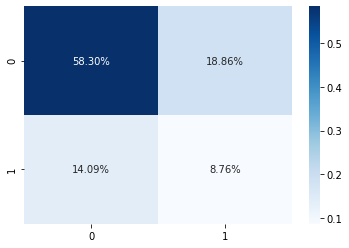

In [ ]:
Mostra_ConfusionMatrix()

### 8. _Fine tuning_ da Rede Neural

Para aumentar a acurácia da Rede Neural, sugiro aumentarmos o número de neurônios na _Hidden Layer_ e/ou aumentar o número de _Hidden Layers_.

No entanto, obtivemos uma acurácia razoável com a Rede Neural _baseline_. Portanto, deixo como exercício para os alunos o desafio de melhorar a acurácia desta Rede Neural.

### 9. Fazer Predições com a Rede Neural

[**Python**] - Comando:
* RN.predict_classes(X_treinamento);
* RN.predict_classes(X_teste).

In [69]:
y_teste = RN.predict_classes(X_test)

df_submit = pd.concat([df_test['id'],pd.DataFrame(y_teste,columns=['target']).astype('boolean')],axis=1)

df_submit.to_csv('/PyLadies_NL_9.csv',index = False, sep = ',')

In [70]:
df_submit['target'].value_counts()

False    935
True      65
Name: target, dtype: Int64

### 10. Conclusões

Desenvolvemos uma Rede Neural capaz de identificar Sexo (_Gender_) com acurácia= 0.9120.